# Water quality
 Набор данных о качестве воды в городской среде. В зависимости от ее состава нужно определить безопасна ли она для употребления человека.
 
 Признаки: 
 ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium'] 
 
 Данные признаки показывают уровень содержания данного вещества в воде на литр (мг/л)

 Класс объекта 'is_safe': 0 - небезопасно, 1 - безопасно

 Число объектов: 7999
 
 Число признаков: 20
 
 Количество классов: 2
 
 Имеются пропущенные значения "#NUM!"
 
 Классы не сбалансированы: 89% на 11%
 

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
data = pd.read_csv('waterQuality1.csv', sep = ',', engine = 'python')
data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

Dtype 'object' указывает на местоположение пропущенных значений

In [35]:
data['is_safe'].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

# Обработка пропущенных значений

In [36]:
data['is_safe']=data['is_safe'].map({'0':0,'1':1,'#NUM!':0})

amm=[]
for i in range(len(data)):
    s=data.loc[i,'ammonia']
    if s=='#NUM!':
        amm+=[0]
    else:
        amm+=[float(s)]
data['ammonia']=amm

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

# Основные характеристики
Посчитаем средние значения по каждому столбцу, среднеквадратичное отклонение, минимальные и максимальные значения, а также матрицу корреляций

In [37]:
data.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,...,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,14.272857,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,...,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673,0.114014
std,1.265145,8.881569,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,...,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904,0.317848
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.560000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.130000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [38]:
data.corr()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.067635,0.225773,0.294145,-0.099911,0.369309,0.353218,0.168612,-0.009784,-0.078238,...,0.020792,-0.003810,0.237307,-0.003306,0.363069,0.243217,-0.003672,0.334993,0.014711,0.334017
ammonia,0.067635,1.000000,0.046962,0.070342,-0.006538,0.105187,0.125149,0.016149,-0.027908,0.063800,...,-0.037558,0.006603,-0.063595,0.020300,0.091325,0.050058,0.029804,0.075846,0.014581,-0.022691
arsenic,0.225773,0.046962,1.000000,0.362945,0.334682,0.356559,0.312475,-0.036444,0.003792,0.035688,...,-0.087756,0.027554,0.305005,-0.015404,0.332279,0.218204,-0.007009,0.307837,0.001455,-0.123311
barium,0.294145,0.070342,0.362945,1.000000,-0.037803,0.446928,0.415972,0.065426,-0.018548,0.101259,...,-0.042888,-0.011331,0.312711,0.005987,0.462234,0.286569,0.035242,0.431606,-0.002440,0.090912
cadmium,-0.099911,-0.006538,0.334682,-0.037803,1.000000,-0.144370,-0.157766,-0.109024,0.004880,-0.092431,...,-0.034959,0.020194,-0.015682,-0.016174,-0.149344,-0.099259,0.010145,-0.155408,-0.005633,-0.256006
chloramine,0.369309,0.105187,0.356559,0.446928,-0.144370,1.000000,0.555938,0.119059,0.004400,0.154510,...,-0.030479,-0.001551,0.379685,-0.021472,0.588769,0.388806,0.011399,0.522447,-0.007658,0.186784
chromium,0.353218,0.125149,0.312475,0.415972,-0.157766,0.555938,1.000000,0.113043,-0.002284,0.142041,...,-0.050501,-0.012793,0.335708,-0.022787,0.524532,0.315271,0.030539,0.510768,-0.005526,0.182381
copper,0.168612,0.016149,-0.036444,0.065426,-0.109024,0.119059,0.113043,1.000000,0.011683,0.149110,...,0.121765,0.002332,0.162093,0.017626,0.104564,0.026215,-0.003267,0.089333,0.006978,0.029540
flouride,-0.009784,-0.027908,0.003792,-0.018548,0.004880,0.004400,-0.002284,0.011683,1.000000,0.014134,...,0.011905,-0.008140,-0.016669,-0.004400,-0.016191,0.007688,0.022629,0.014554,0.016792,0.006616
bacteria,-0.078238,0.063800,0.035688,0.101259,-0.092431,0.154510,0.142041,0.149110,0.014134,1.000000,...,-0.027525,-0.033920,0.246252,-0.004471,0.147652,0.099298,-0.006971,0.148225,0.044839,-0.022021


# Диаграммы рассеяния

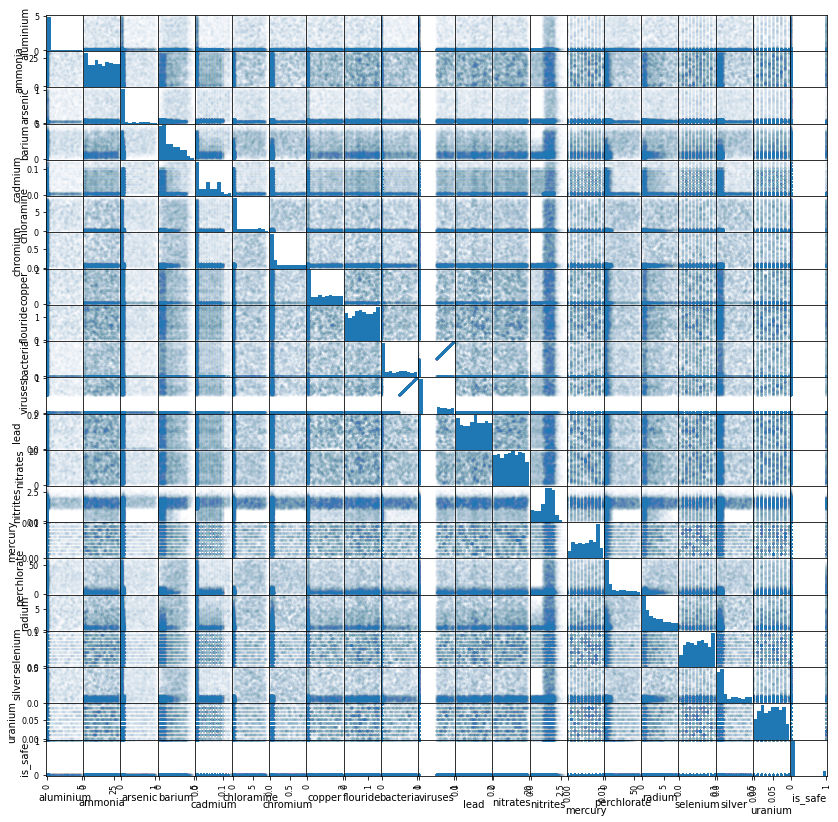

In [39]:
from pandas.plotting import scatter_matrix 
scatter_matrix(data, alpha = .01, figsize = (14, 14))
pass

Заметной корреляции между признаками не обнаружено
# Подготовка данных
Из приведенных данных видно, что все, кроме одного, признаки являются количественными. Класс объекта является категориальным признаком (бинарным).

In [40]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'int64']
print(numerical_columns)

['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']


# Нормализация количественных признаков

In [41]:
data_binary = data['is_safe']
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data = pd.concat((data_numerical, data_binary), axis = 1)
data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.777651,-0.584678,-0.480799,1.054432,-0.993251,-0.711652,2.153315,-0.972944,-1.657351,-0.363187,...,-0.781300,1.129905,-0.348839,0.608788,1.203660,1.661403,1.053706,1.339029,-0.917081,1
1,1.307235,0.775442,-0.599568,1.432693,-1.131949,1.208857,1.599074,-0.223180,0.295000,1.002578,...,0.009460,-1.409196,1.046787,-0.739318,0.893271,0.124602,1.053706,0.851397,0.197998,1
2,0.271780,-0.028470,-0.480799,-0.812204,-0.965511,0.803719,1.044833,-1.202464,0.501719,-0.818443,...,-0.368729,0.783418,-0.383730,0.271762,1.912071,1.786241,0.706121,2.035645,-1.288774,0
3,0.548429,-0.331344,-0.480799,1.144886,-1.159689,1.968491,-0.802637,1.306950,0.708439,1.184681,...,-1.434537,-1.517473,-0.069714,-0.402292,-0.415000,-0.516807,-1.031806,2.105306,0.197998,1
4,0.200642,1.132361,-0.520389,-1.124681,-1.020990,0.192117,1.636024,-0.360892,-0.371096,-0.575640,...,0.301698,-0.555611,-0.383730,-0.739318,0.024859,-0.219779,-1.031806,-0.611496,-0.917081,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,-0.487026,-0.731048,-0.639158,0.314356,-0.077840,-0.809041,-0.802637,-1.187162,1.374535,-0.970194,...,1.676933,0.806878,-0.575628,-0.065265,-0.728781,-0.340312,1.401292,-0.611496,-0.545388,1
7995,-0.487026,1.119976,-0.559978,-0.803981,-0.910032,-0.672697,-0.839586,-1.202464,1.627192,-0.970194,...,-1.176680,0.081420,-0.575628,-1.413371,-0.846944,-0.779398,1.401292,-0.332850,1.313077,1
7996,-0.455409,-0.835760,-0.639158,-0.787535,-0.355237,-0.828519,-0.728738,-1.202464,0.317969,-0.970194,...,1.419076,1.101031,-0.575628,-1.750398,-0.854294,0.826279,-1.726977,-0.750820,0.197998,1
7997,-0.518643,-0.481093,-0.599568,0.355471,-1.187429,-0.068885,-0.913485,-1.095355,-1.772195,-0.970194,...,-1.709584,-1.771925,-2.320161,-1.750398,-0.930619,-1.257226,-1.726977,-1.029466,-1.660467,1


In [42]:
data.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,...,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7999.000000
mean,-4.485023e-14,-4.780621e-15,1.066419e-13,2.481867e-15,1.960515e-14,8.832207e-15,8.488054e-14,-2.329633e-14,1.887407e-15,-8.479833e-16,...,1.429061e-14,-4.066839e-15,-9.094155e-15,-3.336521e-14,-9.331203e-17,-8.303883e-15,4.898778e-14,1.340738e-13,3.300469e-14,0.114014
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.317848
min,-5.265469e-01,-1.616027e+00,-6.391579e-01,-1.289142e+00,-1.187429e+00,-8.479967e-01,-9.134848e-01,-1.233066e+00,-1.772195e+00,-9.701944e-01,...,-1.709584e+00,-1.771925e+00,-2.320161e+00,-1.750398e+00,-9.306189e-01,-1.257226e+00,-1.726977e+00,-1.029466e+00,-1.660467e+00,0.000000
25%,-4.949300e-01,-8.684115e-01,-5.203886e-01,-8.286506e-01,-9.655111e-01,-8.090412e-01,-7.287378e-01,-1.095355e+00,-8.419574e-01,-9.701944e-01,...,-8.844426e-01,-8.696145e-01,-5.756282e-01,-7.393181e-01,-8.079333e-01,-9.042358e-01,-1.031806e+00,-7.508196e-01,-9.170813e-01,0.000000
50%,-4.712173e-01,-1.608461e-02,-4.412090e-01,-3.105974e-01,-7.784042e-02,-6.415322e-01,-5.809402e-01,-8.546847e-02,-3.595071e-03,-3.024867e-01,...,4.384110e-02,2.006335e-02,1.570755e-01,-6.526493e-02,-4.930211e-01,-2.197786e-01,1.095031e-02,-4.721732e-01,1.979978e-01,0.000000
75%,-3.052284e-01,8.846571e-01,-2.432601e-01,7.501783e-01,7.543508e-01,8.037192e-01,7.122887e-01,8.938150e-01,8.921893e-01,8.811771e-01,...,8.861726e-01,8.646257e-01,7.502167e-01,9.458148e-01,7.360972e-01,7.530977e-01,7.061211e-01,6.424126e-01,9.413838e-01,0.000000
max,3.465090e+00,1.752747e+00,3.517769e+00,2.773053e+00,2.418733e+00,2.533346e+00,2.411961e+00,1.827195e+00,1.673130e+00,2.064841e+00,...,1.728504e+00,1.806638e+00,2.791320e+00,1.619868e+00,2.462177e+00,2.182279e+00,1.748877e+00,2.453614e+00,1.684770e+00,1.000000


# Обучающая и тестовая выборка

In [43]:
dataX = data.drop('is_safe', axis=1)
dataY = data['is_safe']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print('Size train: ',N_train)
print('Size test: ', N_test)

Size train:  6399
Size test:  1600


# Метод k-ближайших соседей

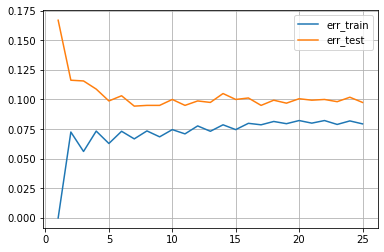

In [44]:
from sklearn.neighbors import KNeighborsClassifier

max_k = 25
x0 = np.arange(1, max_k + 1, 1)
y1 = []
y2 = []
for i in range(max_k):
    knn = KNeighborsClassifier(n_neighbors = i + 1)
    knn.fit(X_train, y_train)
    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)

    err_train = np.mean(y_train != y_train_predict)
    err_test  = np.mean(y_test  != y_test_predict)
    y1 += [err_train]
    y2 += [err_test]
plt.plot(x0, y1, label="err_train")
plt.plot(x0, y2, label="err_test")
plt.legend()
plt.grid(True)
plt.show()

Оптимальное значение ошибки достигается при k = 7

In [45]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print("Метод k-ближайших соседей")
print("Ошибка на обучающем датасете: {}".format(err_train))
print("Ошибка на тестовом датасете: {}".format(err_test))

from sklearn.metrics import confusion_matrix
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_test_predict))

Метод k-ближайших соседей
Ошибка на обучающем датасете: 0.06672917643381779
Ошибка на тестовом датасете: 0.094375
Матрица ошибок:
[[1380   20]
 [ 131   69]]


# Логистическая регрессия

In [46]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)
y_train_predict = lg.predict(X_train)
y_test_predict = lg.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print("Логистическая регрессия")
print("Ошибка на обучающем датасете: {}".format(err_train))
print("Ошибка на тестовом датасете: {}".format(err_test))

from sklearn.metrics import confusion_matrix
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_test_predict))

Логистическая регрессия
Ошибка на обучающем датасете: 0.09079543678699797
Ошибка на тестовом датасете: 0.098125
Матрица ошибок:
[[1378   22]
 [ 135   65]]


# Случайный лес

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print("Случайный лес")
print("Ошибка на обучающем датасете: {}".format(err_train))
print("Ошибка на тестовом датасете: {}".format(err_test))

from sklearn.metrics import confusion_matrix
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_test_predict))

Случайный лес
Ошибка на обучающем датасете: 0.0
Ошибка на тестовом датасете: 0.04375
Матрица ошибок:
[[1394    6]
 [  64  136]]


# Общие выводы
## Метод k-ближайших соседей (k = 7)
Ошибка на обучающем датасете: 0.066

Ошибка на тестовом датасете: 0.094

## Логистическая регрессия
Ошибка на обучающем датасете: 0.090

Ошибка на тестовом датасете: 0.098

## Случайный лес
Ошибка на обучающем датасете: 0.0

Ошибка на тестовом датасете: 0.043

## Итог
Все 3 метода уместно использовать, но лучшие результаты показал метод "Случайный лес"